In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("features_ravdess_04.csv")

# Drop non-numeric columns
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Scale features (PCA requires normalized input)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Combine PCA result with labels for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["label"] = y


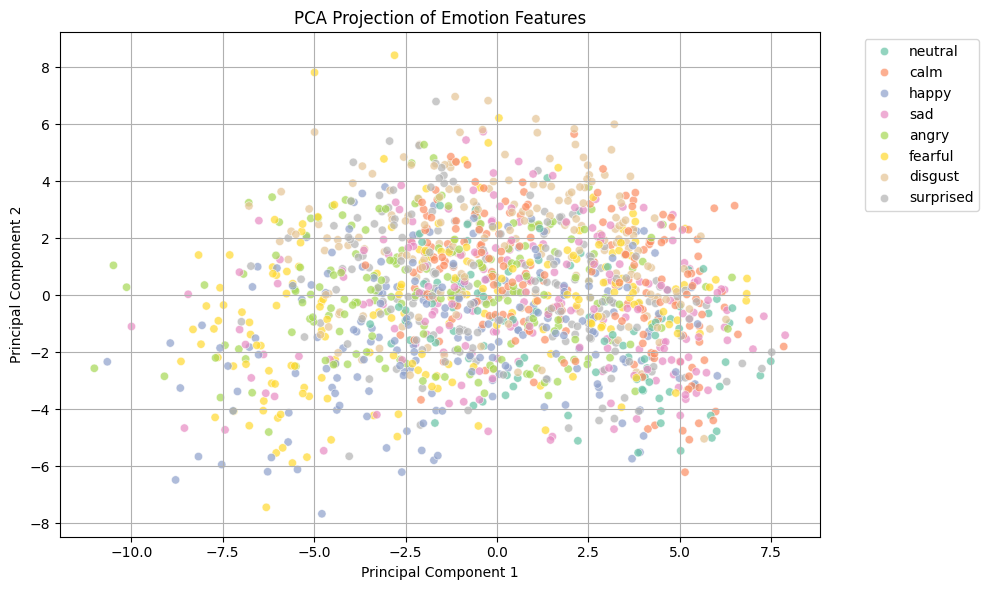

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", alpha=0.7, palette="Set2")
plt.title("PCA Projection of Emotion Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


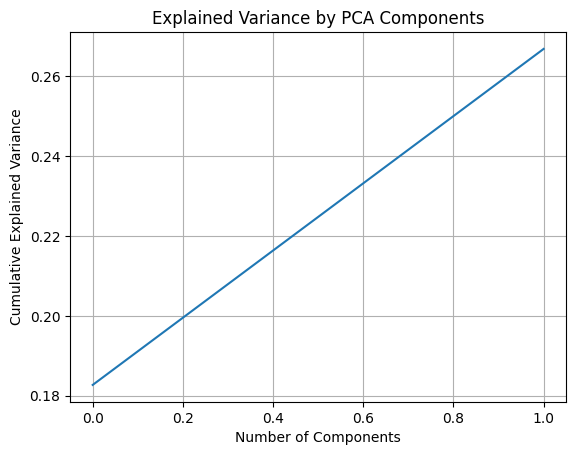

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

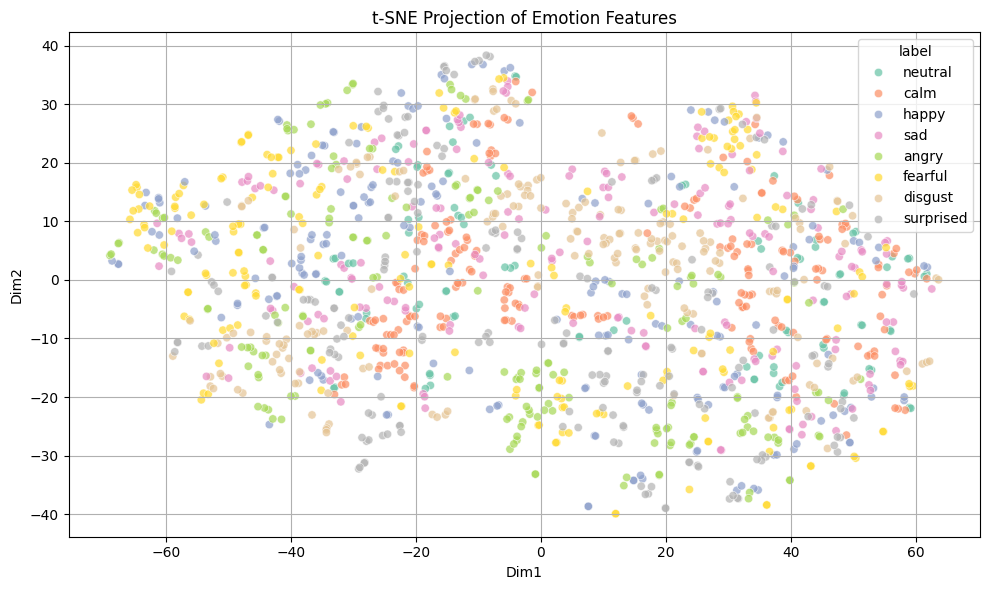

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["label"] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="label", palette="Set2", alpha=0.7)
plt.title("t-SNE Projection of Emotion Features")
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


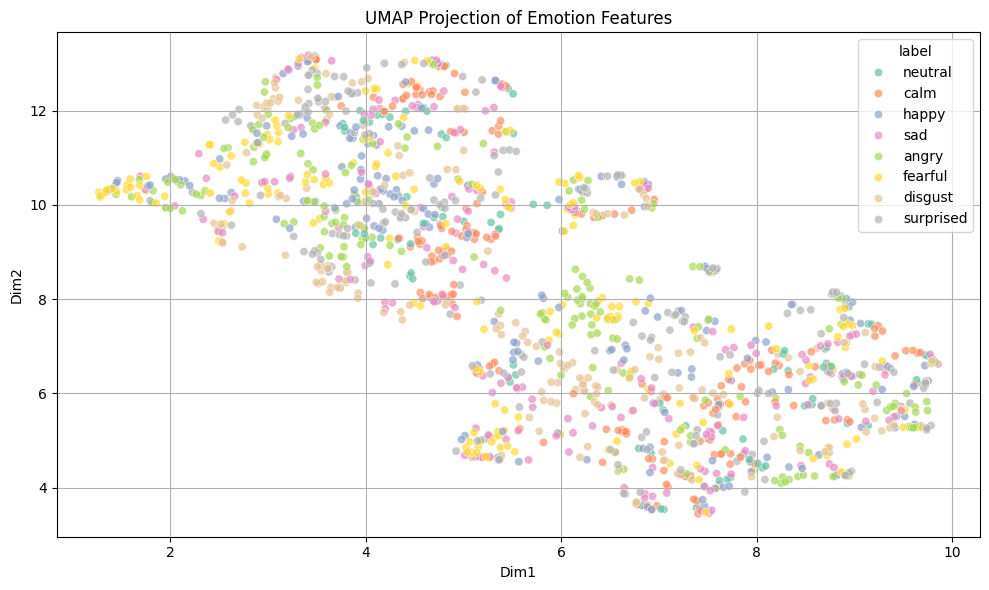

In [7]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

umap_df = pd.DataFrame(X_umap, columns=["Dim1", "Dim2"])
umap_df["label"] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x="Dim1", y="Dim2", hue="label", palette="Set2", alpha=0.7)
plt.title("UMAP Projection of Emotion Features")
plt.tight_layout()
plt.grid(True)
plt.show()
